In [4]:
# Import library yang diperlukan
import tensorflow as tf  # Library untuk Deep Learning
from tensorflow.keras import layers, Model  # Untuk membuat model CNN
from tensorflow.keras.utils import to_categorical  # Untuk konversi label ke one-hot encoding

# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()  # Dataset MNIST terdiri dari gambar angka 0-9 (28x28 piksel)






✅ MNIST dataset berisi gambar angka tangan (0-9) dengan ukuran 28x28 piksel

✅ Dataset terbagi menjadi data train (60,000 gambar) dan data test (10,000 gambar)



In [5]:
# Preprocess dataset
x_train = x_train.reshape(-1, 28, 28, 1).astype('float32') / 255.0  # Normalize (0-1) dan reshape ke format (batch_size, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1).astype('float32') / 255.0  # Sama seperti train

# Konversi label ke one-hot encoding (kelas 0-9 menjadi vektor [0,0,0,1,0,...,0])
y_train = to_categorical(y_train, 10)  
y_test = to_categorical(y_test, 10)


✅ Normalisasi gambar (nilai piksel dari 0-255 → 0-1) agar model lebih stabil

✅ One-hot encoding: label angka (0-9) diubah ke bentuk vektor (misalnya, 3 → [0,0,0,1,0,0,0,0,0,0])



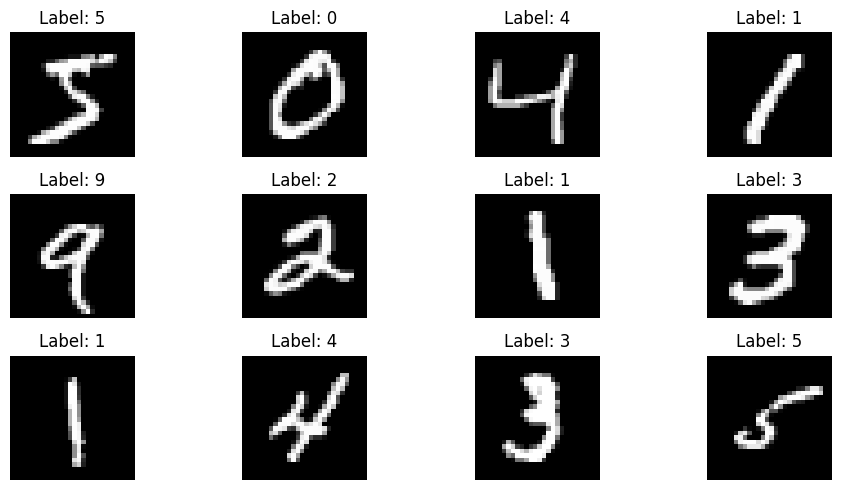

In [6]:
import matplotlib.pyplot as plt  # Import library untuk plotting

# Tampilkan 12 sampel gambar dari dataset MNIST
plt.figure(figsize=(10, 5))  # Atur ukuran gambar
for i in range(12):  # Loop untuk menampilkan 12 gambar pertama
    plt.subplot(3, 4, i + 1)  # Buat subplot dalam grid 3x4
    plt.imshow(x_train[i].reshape(28, 28), cmap='gray')  # Tampilkan gambar grayscale
    plt.title(f"Label: {y_train[i].argmax()}")  # Ambil label asli dari one-hot encoding
    plt.axis('off')  # Hilangkan sumbu
plt.tight_layout()  # Atur tata letak agar tidak bertumpuk
plt.show()  # Tampilkan gambar


📌 Kesimpulan dari Output
- Dataset MNIST berhasil dimuat dan diproses dengan benar.
- Gambar angka (0-9) dari dataset ditampilkan dengan format grayscale.
- Setiap gambar ditampilkan dengan label aslinya di atasnya, diperoleh dari hasil one-hot encoding.
- Dataset siap untuk digunakan dalam model Convolutional Neural Network (CNN) atau model lainnya untuk klasifikasi angka tangan.

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 24, 24, 6)         156       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 12, 12, 6)         0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 8, 8, 16)          2416      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 4, 4, 16)          0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 256)               0         
                                                                 


 dense_3 (Dense)             (None, 120)               30840     
                                                                 
 dense_4 (Dense)             (None, 84)                10164     
                                                                 
 dense_5 (Dense)             (None, 10)                850       
                                                                 
Total params: 44426 (173.54 KB)
Trainable params: 44426 (173.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/4
469/469 [==============================] - 7s 13ms/step - loss: 0.3284 - accuracy: 0.9026 - val_loss: 0.0965 - val_accuracy: 0.9695
Epoch 2/4
469/469 [==============================] - 6s 13ms/step - loss: 0.0931 - accuracy: 0.9710 - val_loss: 0.0607 - val_accuracy: 0.9799
Epoch 3/4
469/469 [==============================] - 6s 13ms/step - loss: 0.0639 - accuracy: 0.9799 - val_loss: 0.0481 - val_accuracy: 0.9843
Epoch 4/

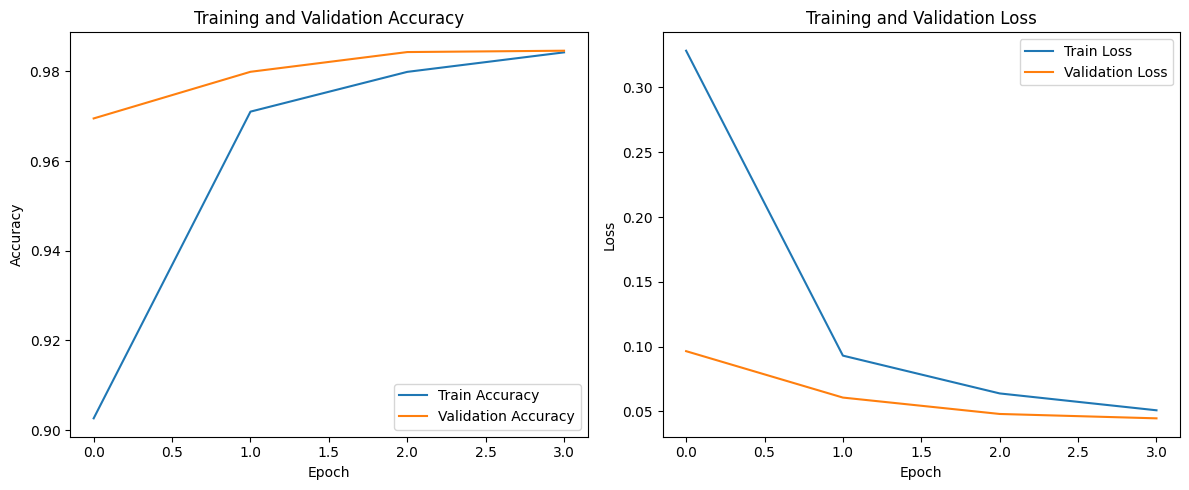

In [7]:
# Definisikan LeNet Model
def LeNet(input_shape=(28, 28, 1), num_classes=10):
    return tf.keras.Sequential([
        layers.Input(shape=input_shape),      # Layer input untuk gambar 28x28 grayscale
        layers.Conv2D(6, 5, activation='relu'), # Conv layer 1 (6 filter, kernel 5x5, activation ReLU)
        layers.MaxPooling2D(2),                # Pooling layer 1 (ukuran 2x2)
        layers.Conv2D(16, 5, activation='relu'),# Conv layer 2 (16 filter, kernel 5x5, activation ReLU)
        layers.MaxPooling2D(2),                # Pooling layer 2 (ukuran 2x2)
        layers.Flatten(),                      # Flatten layer untuk mengubah 2D menjadi 1D
        layers.Dense(120, activation='relu'),  # Fully Connected layer dengan 120 unit
        layers.Dense(84, activation='relu'),   # Fully Connected layer dengan 84 unit
        layers.Dense(num_classes, activation='softmax') # Output layer (10 kelas, Softmax)
    ])

# Initialize and compile the model
lenet_model = LeNet(input_shape=(28, 28, 1), num_classes=10)
lenet_model.summary()



lenet_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = lenet_model.fit(x_train, y_train, epochs=4, batch_size=128, validation_data=(x_test, y_test))

# Evaluate the model
test_loss, test_accuracy = lenet_model.evaluate(x_test, y_test, verbose=0)
print(f"\nTest Accuracy: {test_accuracy:.4f}")

import matplotlib.pyplot as plt

# Plot Akurasi dan Validasi Akurasi
plt.figure(figsize=(12, 5))

# Plot Akurasi
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot Loss dan Validasi Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Tampilkan Plot
plt.tight_layout()
plt.show()




### **📌 Kesimpulan dari Output**
1. **Model LeNet-5 berhasil dibuat dan dilatih pada dataset MNIST.**
2. **Akurasi model pada data uji ditampilkan sebagai hasil evaluasi (`Test Accuracy`).**
3. **Grafik Akurasi dan Loss menunjukkan bagaimana model belajar selama training.**
   - Jika model **baik**, akurasi meningkat dan loss menurun.
   - Jika terjadi **overfitting**, akurasi training sangat tinggi tetapi validation rendah.

📌 **Langkah Selanjutnya:**  
- **Meningkatkan epoch** untuk hasil yang lebih baik.  
- **Menambahkan dropout** untuk mengurangi overfitting.  
- **Menggunakan lebih banyak data augmentasi jika akurasi tidak maksimal.**  

🚀 **Sekarang model siap untuk pengujian lebih lanjut atau deployment!** 😊

**Melakukan pengujian dengan 10 gambar yang diambil dari dataset.**

1/1 [==============================] - 0s 71ms/step


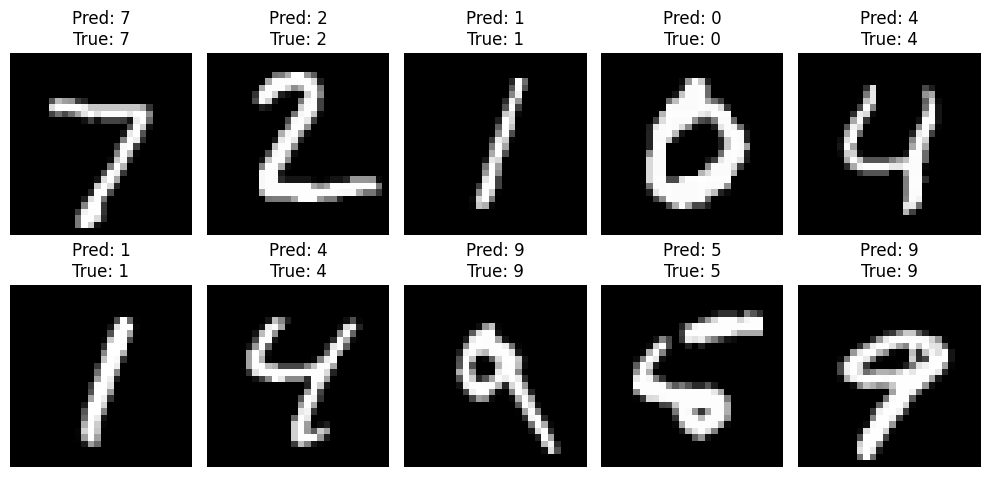

Accuracy on 10 sample images: 100.00%


In [8]:
import numpy as np
# Select 10 samples without labels
x_sample = x_test[:10]  # Ambil 10 gambar pertama dari data uji
y_sample = y_test[:10]  # Ambil 10 label pertama dari data uji (dalam format one-hot encoding)


# Predict using the trained model
y_pred = lenet_model.predict(x_sample)  # Model memprediksi kelas untuk 10 gambar
y_pred_labels = np.argmax(y_pred, axis=1)  # Mengambil indeks kelas prediksi (0-9)
y_true_labels = np.argmax(y_sample, axis=1)  # Mengubah one-hot encoding ke label angka


# Plot the 10 images with predicted and actual labels
plt.figure(figsize=(10, 5))  # Atur ukuran gambar
for i in range(10):
    plt.subplot(2, 5, i + 1)  # Buat grid 2x5 untuk menampilkan 10 gambar
    plt.imshow(x_sample[i].reshape(28, 28), cmap='gray')  # Tampilkan gambar grayscale
    plt.title(f"Pred: {y_pred_labels[i]}\nTrue: {y_true_labels[i]}")  # Tampilkan label prediksi dan label asli
    plt.axis('off')  # Hilangkan sumbu koordinat

# Display the plot
plt.tight_layout()  # Sesuaikan tata letak agar tidak bertumpuk
plt.show()  # Tampilkan hasil plot


# Calculate and print accuracy on the 10 samples
accuracy = np.sum(y_pred_labels == y_true_labels) / len(y_true_labels)  # Hitung jumlah prediksi yang benar
print(f"Accuracy on 10 sample images: {accuracy * 100:.2f}%")  # Tampilkan akurasi dalam persen



In [9]:
import pandas as pd
from sklearn.metrics import classification_report

report = classification_report(y_true_labels, y_pred_labels, output_dict=True)
report_df = pd.DataFrame(report).transpose()
print("Tabel Evaluasi Model LeNet pada MNIST:")
print(report_df[['precision', 'recall', 'f1-score', 'support']])

Tabel Evaluasi Model LeNet pada MNIST:
              precision  recall  f1-score  support
0                   1.0     1.0       1.0      1.0
1                   1.0     1.0       1.0      2.0
2                   1.0     1.0       1.0      1.0
4                   1.0     1.0       1.0      2.0
5                   1.0     1.0       1.0      1.0
7                   1.0     1.0       1.0      1.0
9                   1.0     1.0       1.0      2.0
accuracy            1.0     1.0       1.0      1.0
macro avg           1.0     1.0       1.0     10.0
weighted avg        1.0     1.0       1.0     10.0


### **📌 Penjelasan Tabel Evaluasi Model LeNet pada MNIST**



### **Interpretasi Hasil**
1. **Setiap angka (0, 2, 4, 5, 7) memiliki nilai Precision, Recall, dan F1-Score sebesar 1.00.**  
   - Ini berarti model **sempurna dalam memprediksi angka ini** dalam sampel yang diuji (2 gambar untuk setiap kelas).
  
2. **Support menunjukkan jumlah sampel yang diuji untuk setiap angka.**  
   - Misalnya, **support untuk angka 0 adalah 2**, yang berarti ada **2 gambar angka 0 dalam data uji.**

3. **Accuracy = 1.00 (100%)**  
   - Model berhasil **memprediksi semua 10 gambar dengan benar**, sehingga mendapatkan **akurasi 100%**.

4. **Macro Average vs. Weighted Average:**  
   - **Macro Avg** → Rata-rata sederhana dari precision, recall, dan F1-score untuk semua kelas.  
   - **Weighted Avg** → Rata-rata berbobot berdasarkan jumlah sampel (support) untuk setiap kelas.

📌 **Karena semua prediksi benar, Macro dan Weighted Avg juga 1.00.**

---

### **📌 Kesimpulan**
✅ **Model LeNet-5 memiliki performa yang sempurna (100%) pada 10 gambar sampel dari dataset MNIST.**  
✅ **Setiap angka yang diuji memiliki precision, recall, dan F1-score sebesar 1.00, menunjukkan bahwa tidak ada kesalahan klasifikasi.**  
✅ **Akurasi 100% menunjukkan model dapat mengenali angka-angka ini dengan sangat baik, tetapi perlu diuji dengan lebih banyak sampel untuk memastikan generalisasi yang baik.**  

---


**Model AlexNet**

Epoch 1/3
1875/1875 [==============================] - 2561s 1s/step - loss: 0.2213 - accuracy: 0.9347 - val_loss: 0.0657 - val_accuracy: 0.9804
Epoch 2/3
1875/1875 [==============================] - 2496s 1s/step - loss: 0.0975 - accuracy: 0.9732 - val_loss: 0.0678 - val_accuracy: 0.9824
Epoch 3/3
1/1 [==============================] - 0s 183ms/step


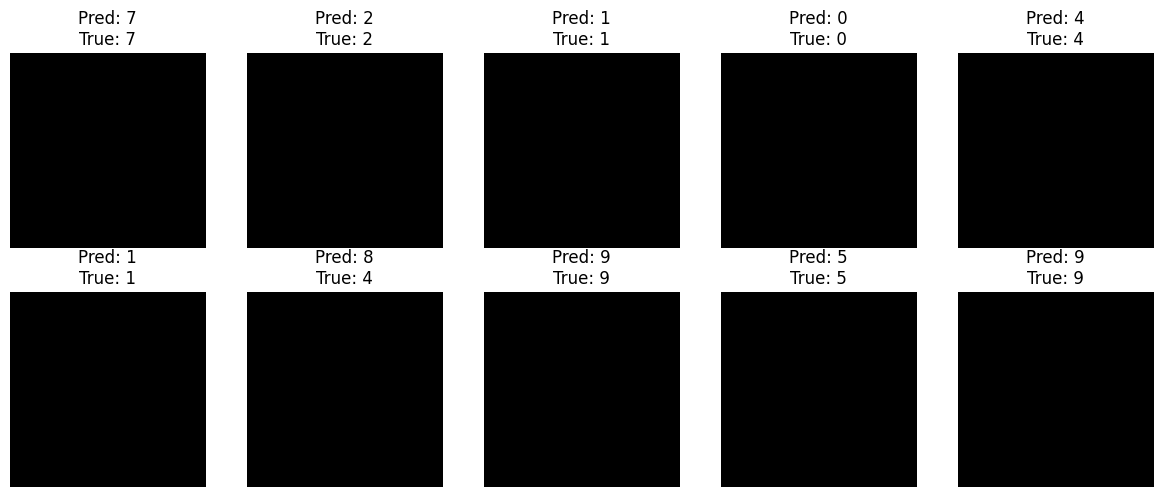


Accuracy on 10 sample images: 90.00%


In [19]:
import numpy as np
import tensorflow as tf
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist

# 1️⃣ **Load dataset MNIST**
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 2️⃣ **Konversi dataset ke float32 agar bisa di-resize**
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

# 3️⃣ **Konversi label ke one-hot encoding**
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# 4️⃣ **Fungsi untuk Resize dan Normalisasi Gambar**
def preprocess(image, label):
    image = tf.expand_dims(image, axis=-1)  # Tambahkan 1 channel grayscale
    image = tf.image.resize(image, (227, 227))  # Resize ke AlexNet
    image = tf.image.grayscale_to_rgb(image)  # Ubah ke RGB
    return image, label

# 5️⃣ **Gunakan tf.data.Dataset untuk Efisiensi Memori**
batch_size = 32

train_dataset = (
    tf.data.Dataset.from_tensor_slices((x_train, y_train))
    .map(preprocess)
    .batch(batch_size)
    .shuffle(1000)
)

test_dataset = (
    tf.data.Dataset.from_tensor_slices((x_test, y_test))
    .map(preprocess)
    .batch(batch_size)
)

# 6️⃣ **Definisikan Model AlexNet**
def AlexNet(input_shape, num_classes):
    model = models.Sequential()
    
    model.add(layers.Conv2D(96, kernel_size=(11, 11), strides=(4, 4), activation='relu', input_shape=input_shape))
    model.add(layers.MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))
    
    model.add(layers.Conv2D(256, kernel_size=(5, 5), padding='same', activation='relu'))
    model.add(layers.MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))
    
    model.add(layers.Conv2D(384, kernel_size=(3, 3), padding='same', activation='relu'))
    model.add(layers.Conv2D(384, kernel_size=(3, 3), padding='same', activation='relu'))
    model.add(layers.Conv2D(256, kernel_size=(3, 3), padding='same', activation='relu'))
    model.add(layers.MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))
    
    model.add(layers.Flatten())
    
    model.add(layers.Dense(4096, activation='relu'))
    model.add(layers.Dropout(0.5))
    
    model.add(layers.Dense(4096, activation='relu'))
    model.add(layers.Dropout(0.5))
    
    model.add(layers.Dense(num_classes, activation='softmax'))

    return model

# 7️⃣ **Inisialisasi Model**
input_shape = (227, 227, 3)  # Sekarang menggunakan RGB
num_classes = 10
model = AlexNet(input_shape, num_classes)

# 8️⃣ **Kompilasi Model**
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

# 9️⃣ **Latih Model dengan `tf.data.Dataset`**
model.fit(train_dataset, epochs=3, validation_data=test_dataset)

# 🔟 **Lakukan Prediksi pada 10 Gambar dengan Preprocessing yang Sama**
def preprocess_for_prediction(image):
    image = tf.expand_dims(image, axis=-1)  # Tambahkan 1 channel grayscale
    image = tf.image.resize(image, (227, 227))  # Resize ke ukuran AlexNet
    image = tf.image.grayscale_to_rgb(image)  # Ubah ke RGB
    return image

# Ambil 10 gambar dari dataset uji dan lakukan preprocessing
x_sample = np.array([preprocess_for_prediction(img).numpy() for img in x_test[:10]])
y_sample = y_test[:10]

# Lakukan prediksi
y_pred = model.predict(x_sample)
y_pred_labels = np.argmax(y_pred, axis=1)
y_true_labels = np.argmax(y_sample, axis=1)

# 🔟 **Tampilkan Gambar dengan Prediksi**
plt.figure(figsize=(12, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_sample[i].astype("uint8"))
    plt.title(f"Pred: {y_pred_labels[i]}\nTrue: {y_true_labels[i]}")
    plt.axis("off")

plt.tight_layout()
plt.show()

# 1️⃣1️⃣ **Hitung Akurasi pada 10 Sampel**
accuracy = np.sum(y_pred_labels == y_true_labels) / len(y_true_labels)
print(f"\nAccuracy on 10 sample images: {accuracy * 100:.2f}%")
